In [6]:
%load_ext autoreload
%autoreload 2

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import ceil
from CIoTS import *
from tqdm import trange

In [8]:
runs = 20
dimensions = 4
data_length = 10000
alpha = 0.05

In [9]:
ics = ["aic", "bic", "hqic"]

In [10]:
p_estimations = pd.DataFrame(columns=['p' ,'method', 'mean_p', 'std_p'])
f1_scores = pd.DataFrame(columns=['p' ,'method', 'mean_f1', 'std_f1'])

In [11]:
for p in trange(2, 22, 2):
    incoming_edges = 3
    f1 = {ic: [] for ic in ics}
    f1['real'] = []
    
    p_est = {ic: [] for ic in ics}
    
    for i in trange(runs):
        generator = CausalTSGenerator(dimensions=dimensions, max_p=p, data_length=data_length, incoming_edges=incoming_edges)
        ts = generator.generate()
        predicted_graph = pc_chen_modified(partial_corr_test, ts, p, alpha)
        
        f1['real'].append(evaluate_edges(generator.graph, predicted_graph)['f1-score'])
        
        var_ranking, var_scores = var_order_select(ts, 2*p, ics) 
        for ic in ics:
            predicted_graph = pc_chen_modified(partial_corr_test, ts, var_ranking[ic][0], alpha)
        
            p_est[ic].append(var_ranking[ic][0])
            f1[ic].append(evaluate_edges(generator.graph, predicted_graph)['f1-score'])
    
    
    f1_scores = f1_scores.append({'p': p, 'method': 'real', 'mean_f1': np.mean(f1['real']), 'std_f1': np.std(f1['real'])},
                                 ignore_index=True)
    for ic in ics:
        p_estimations = p_estimations.append({'p': p, 'method': ic, 'mean_p': np.mean(p_est[ic]), 'std_p': np.std(p_est[ic])},
                                             ignore_index=True)
        f1_scores = f1_scores.append({'p': p, 'method': ic, 'mean_f1': np.mean(f1[ic]), 'std_f1': np.std(f1[ic])},
                                     ignore_index=True)
        
f1_scores.to_csv('f1_scores.csv')
p_estimations.to_csv('p_estimations.csv')



  0%|          | 0/10 [00:00<?, ?it/s]


  0%|          | 0/20 [00:00<?, ?it/s]


  5%|▌         | 1/20 [00:02<00:53,  2.80s/it]


 10%|█         | 2/20 [00:06<00:59,  3.29s/it]


 15%|█▌        | 3/20 [00:13<01:14,  4.41s/it]


 20%|██        | 4/20 [00:15<01:01,  3.87s/it]


 25%|██▌       | 5/20 [00:23<01:11,  4.79s/it]


 30%|███       | 6/20 [00:26<01:01,  4.37s/it]


 35%|███▌      | 7/20 [00:27<00:50,  3.92s/it]


 40%|████      | 8/20 [00:29<00:43,  3.65s/it]


 45%|████▌     | 9/20 [00:35<00:43,  3.95s/it]


 50%|█████     | 10/20 [00:41<00:41,  4.11s/it]


 55%|█████▌    | 11/20 [00:47<00:39,  4.36s/it]


 60%|██████    | 12/20 [00:50<00:33,  4.18s/it]


 65%|██████▌   | 13/20 [00:58<00:31,  4.48s/it]


 70%|███████   | 14/20 [00:59<00:25,  4.26s/it]


 75%|███████▌  | 15/20 [01:03<00:21,  4.23s/it]


 80%|████████  | 16/20 [01:07<00:16,  4.22s/it]


 85%|████████▌ | 17/20 [01:13<00:12,  4.31s/it]


 90%|█████████ | 18/20 [01:18<00:08,  4.35s/it]


 95%|█████████▌| 19/20 [0

KeyboardInterrupt: 

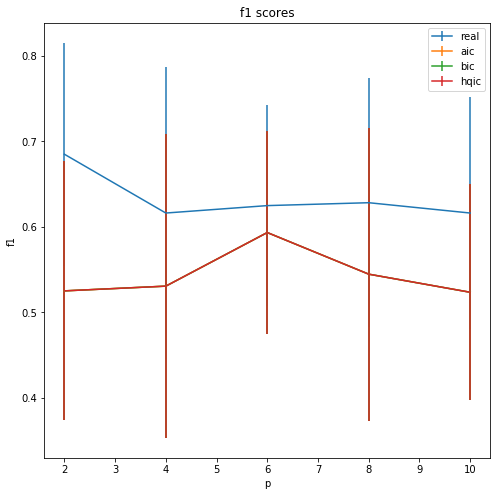

In [13]:
plt.figure(figsize=(8,8))
plt.title('f1 scores')
plt.xlabel('p')
plt.ylabel('f1')

plt.errorbar(x=f1_scores.loc[f1_scores['method']=='real', 'p'],
             y=f1_scores.loc[f1_scores['method']=='real', 'mean_f1'],
             yerr=f1_scores.loc[f1_scores['method']=='real', 'std_f1'],
             label='real')
for ic in ics:
    plt.errorbar(x=f1_scores.loc[f1_scores['method']==ic, 'p'],
                 y=f1_scores.loc[f1_scores['method']==ic, 'mean_f1'],
                 yerr=f1_scores.loc[f1_scores['method']==ic, 'std_f1'],
                 label=ic)
plt.legend()
plt.show()

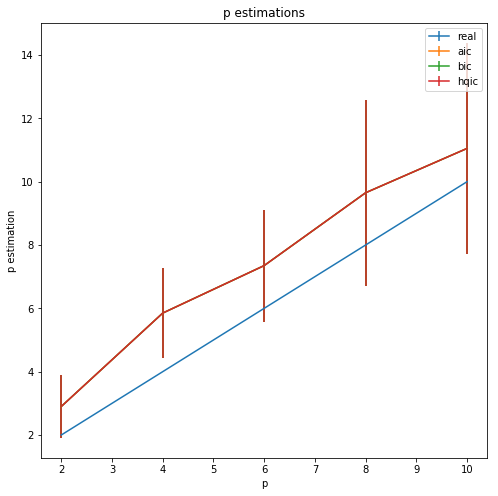

In [16]:
plt.figure(figsize=(8,8))
plt.title('p estimations')
plt.xlabel('p')
plt.ylabel('p estimation')

plt.errorbar(x=range(2, 12, 2),
             y=range(2, 12, 2),
             yerr=0,
             label='real')

for ic in ics:
    plt.errorbar(x=p_estimations.loc[p_estimations['method']==ic, 'p'],
                 y=p_estimations.loc[p_estimations['method']==ic, 'mean_p'],
                 yerr=p_estimations.loc[p_estimations['method']==ic, 'std_p'],
                 label=ic)
plt.legend()
plt.show()

,p,method,mean_p,std_p
0,2,aic,2.90,0.994987
1,2,bic,2.90,0.994987
2,2,hqic,2.90,0.994987
3,4,aic,5.85,1.423903
4,4,bic,5.85,1.423903
5,4,hqic,5.85,1.423903
6,6,aic,7.35,1.768474
7,6,bic,7.35,1.768474
8,6,hqic,7.35,1.768474
9,8,aic,9.65,2.937261
